In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Bascically we try to understand how to understand the data and explore relationships between two or more factors in the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:


# Try reading the file with a different encoding
df = pd.read_csv("/content/drive/MyDrive/EDA ANALYSIS/zomato.csv", encoding='latin1')

# If 'latin1' doesn't work, you can try 'ISO-8859-1' or 'cp1252'
# df = pd.read_csv("/content/drive/MyDrive/EDA ANALYSIS/zomato.csv", encoding='ISO-8859-1')
# df = pd.read_csv("/content/drive/MyDrive/EDA ANALYSIS/zomato.csv", encoding='cp1252')

print(df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Finding missing value

In [ ]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
[features for features in df.columns if df[features].isnull().sum()>1]

['Cuisines']

<Axes: >

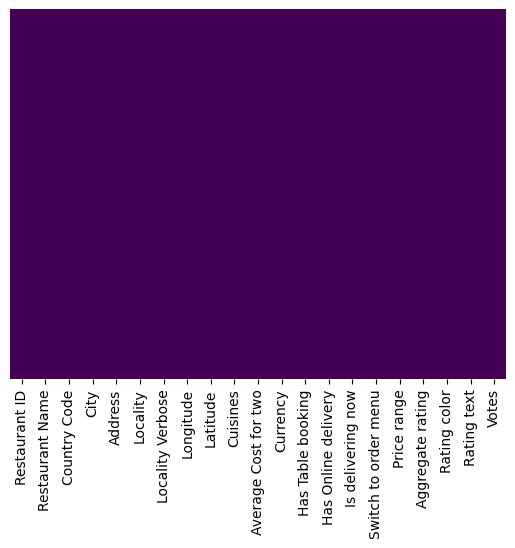

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
!pip install openpyxl


In [ ]:
pip install --upgrade pandas openpyxl xlrd odfpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 52.0 MB/s eta 0:00:00
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160671 sha256=d0cd7a83fbe48aae940dd24e6c04ccb615d1e7fbbe059118e3f0027a3464b06c
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompat

In [ ]:
df_country = pd.read_excel("/content/drive/MyDrive/EDA ANALYSIS/Country-Code.xlsx")

In [ ]:
df_country.head(25)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [ ]:
zomato = pd.merge(df,df_country, on = 'Country Code')


In [ ]:
zomato.head(25)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,Phillipines
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Yes,No,No,No,4,4.0,Green,Very Good,520,Phillipines
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Yes,No,No,No,4,4.2,Green,Very Good,677,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,532,Phillipines


In [ ]:
unique_values = zomato['Country'].unique()
print(unique_values)

['Phillipines' 'Brazil' 'United States' 'Australia' 'Canada' 'Singapore'
 'UAE' 'India' 'Indonesia' 'New Zealand' 'United Kingdom' 'Qatar'
 'South Africa' 'Sri Lanka' 'Turkey']


In [ ]:
zomato.dtypes


,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [ ]:
zomato.Country.value_counts()

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
UAE,60
South Africa,60
New Zealand,40
Turkey,34
Australia,24


In [ ]:
country_names=zomato.Country.value_counts().index

In [ ]:
country_count=zomato.Country.value_counts().values


([<matplotlib.patches.Wedge at 0x7e1beff63f40>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

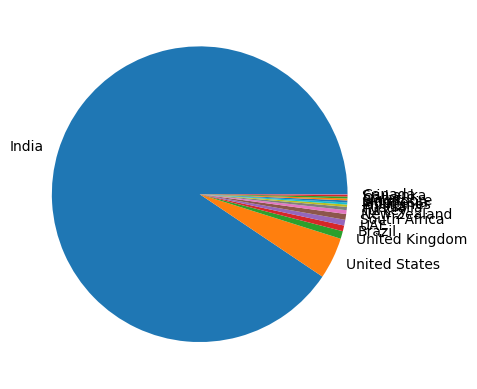

In [ ]:
plt.pie(country_count,labels=country_names)

we print only top three countries


([<matplotlib.patches.Wedge at 0x7e1bef113760>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

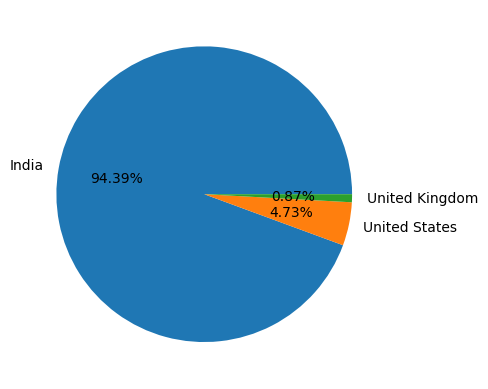

In [ ]:
plt.pie(country_count[:3],labels=country_names[:3],autopct='%1.2f%%')

Hence we conclude maximum transactions for Zomato is from india followed by USA and UK

In [ ]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
zomato.groupby(["Aggregate rating","Rating color","Rating text"]).size()

,,,0
Aggregate rating,Rating color,Rating text,
0.0,White,Not rated,2148
1.8,Red,Poor,1
1.9,Red,Poor,2
2.0,Red,Poor,7
2.1,Red,Poor,15
2.2,Red,Poor,27
2.3,Red,Poor,47
2.4,Red,Poor,87
2.5,Orange,Average,110


In [ ]:
zomato.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns={0:"Rating Count"})


,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [ ]:
ratings=zomato.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns={0:"Rating Count"})


max is 0 rating, so they havent rated zomato mostly

# OBSERVATION
1.  When rating is between 4.5 to 4.9-Excellent.
2.  When rating is between 4.0 to 4.4-Very Good.
3. When rating is between 3.9 to 3.5-Good.
4. When rating is between 3.4 to 2.5-Average.
5.When rating is between 2.4 to 1.8=Poor.




In [ ]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             33 non-null     int64  
 1   Aggregate rating  33 non-null     float64
 2   Rating color      33 non-null     object 
 3   Rating text       33 non-null     object 
 4   Rating Count      33 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.4+ KB
None


In [ ]:
print(ratings.head())

   index  Aggregate rating Rating color Rating text  Rating Count
0      0               0.0        White   Not rated          2148
1      1               1.8          Red        Poor             1
2      2               1.9          Red        Poor             2
3      3               2.0          Red        Poor             7
4      4               2.1          Red        Poor            15


In [ ]:
print(ratings.isna().sum())

index               0
Aggregate rating    0
Rating color        0
Rating text         0
Rating Count        0
dtype: int64


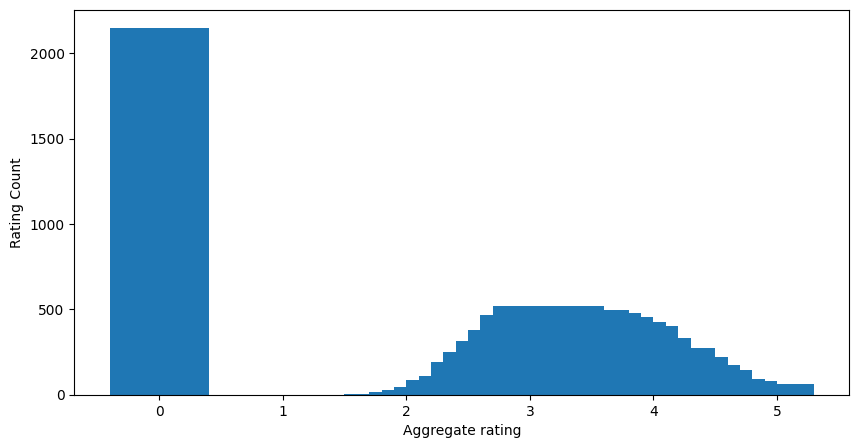

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(ratings["Aggregate rating"], ratings["Rating Count"])
plt.xlabel("Aggregate rating")
plt.ylabel("Rating Count")
plt.show()

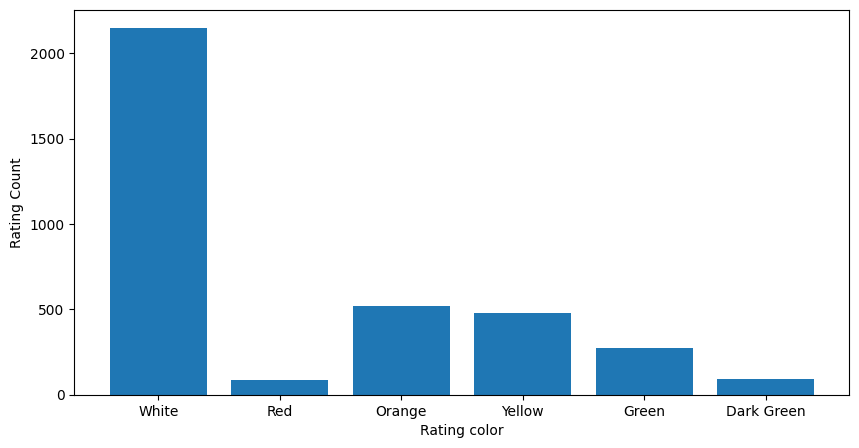

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(ratings["Rating color"],ratings["Rating Count"])
plt.xlabel("Rating color")
plt.ylabel("Rating Count")
plt.show()

In [ ]:
zomato[zomato["Rating color"]=="White"].groupby("Country").size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


#Observations
Maximum number of 0 ratings are from Indian customers

In [ ]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [ ]:
money=zomato.groupby(["Currency","Country"]).size().reset_index()


In [ ]:
money

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [ ]:
zomato[zomato["Has Online delivery"]=="Yes"].groupby("Country").size().reset_index()

,Country,0
0,India,2423
1,UAE,28


In [ ]:
zomato.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Guwahati', 'Amritsar', 'Lucknow', 'Ahmedabad',
       ...
       'Mayfield', 'Macedon', 'Lorn', 'Lakes Entrance', 'Inverloch',
       'Huskisson', 'Panchkula', 'Forrest', 'Flaxton', 'Chatham-Kent'],
      dtype='object', name='City', length=141)

In [ ]:
city_values=zomato.City.value_counts().values
city_labels=zomato.City.value_counts().index

([<matplotlib.patches.Wedge at 0x7e1bee625570>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

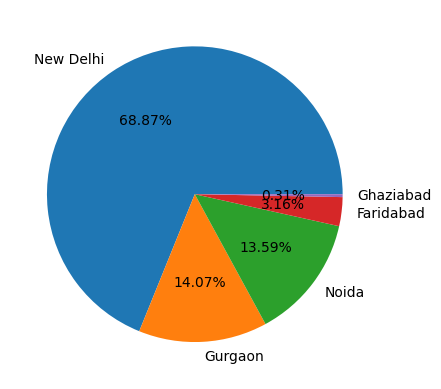

In [ ]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')